In [149]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt

# Load data
df = pd.read_csv('/datc/parcel/notebooks/data/postnl/20200904_sample.csv', index_col=0, parse_dates=[1])

# Manipulate data
# df['dag'] = df['procesdag'].dt.day
new_df = df.groupby([df['cust_id'], df['procesdag']]).agg(
    totaal_aantal_pakketten = ('aantal_pakketten', 'sum')).reset_index()

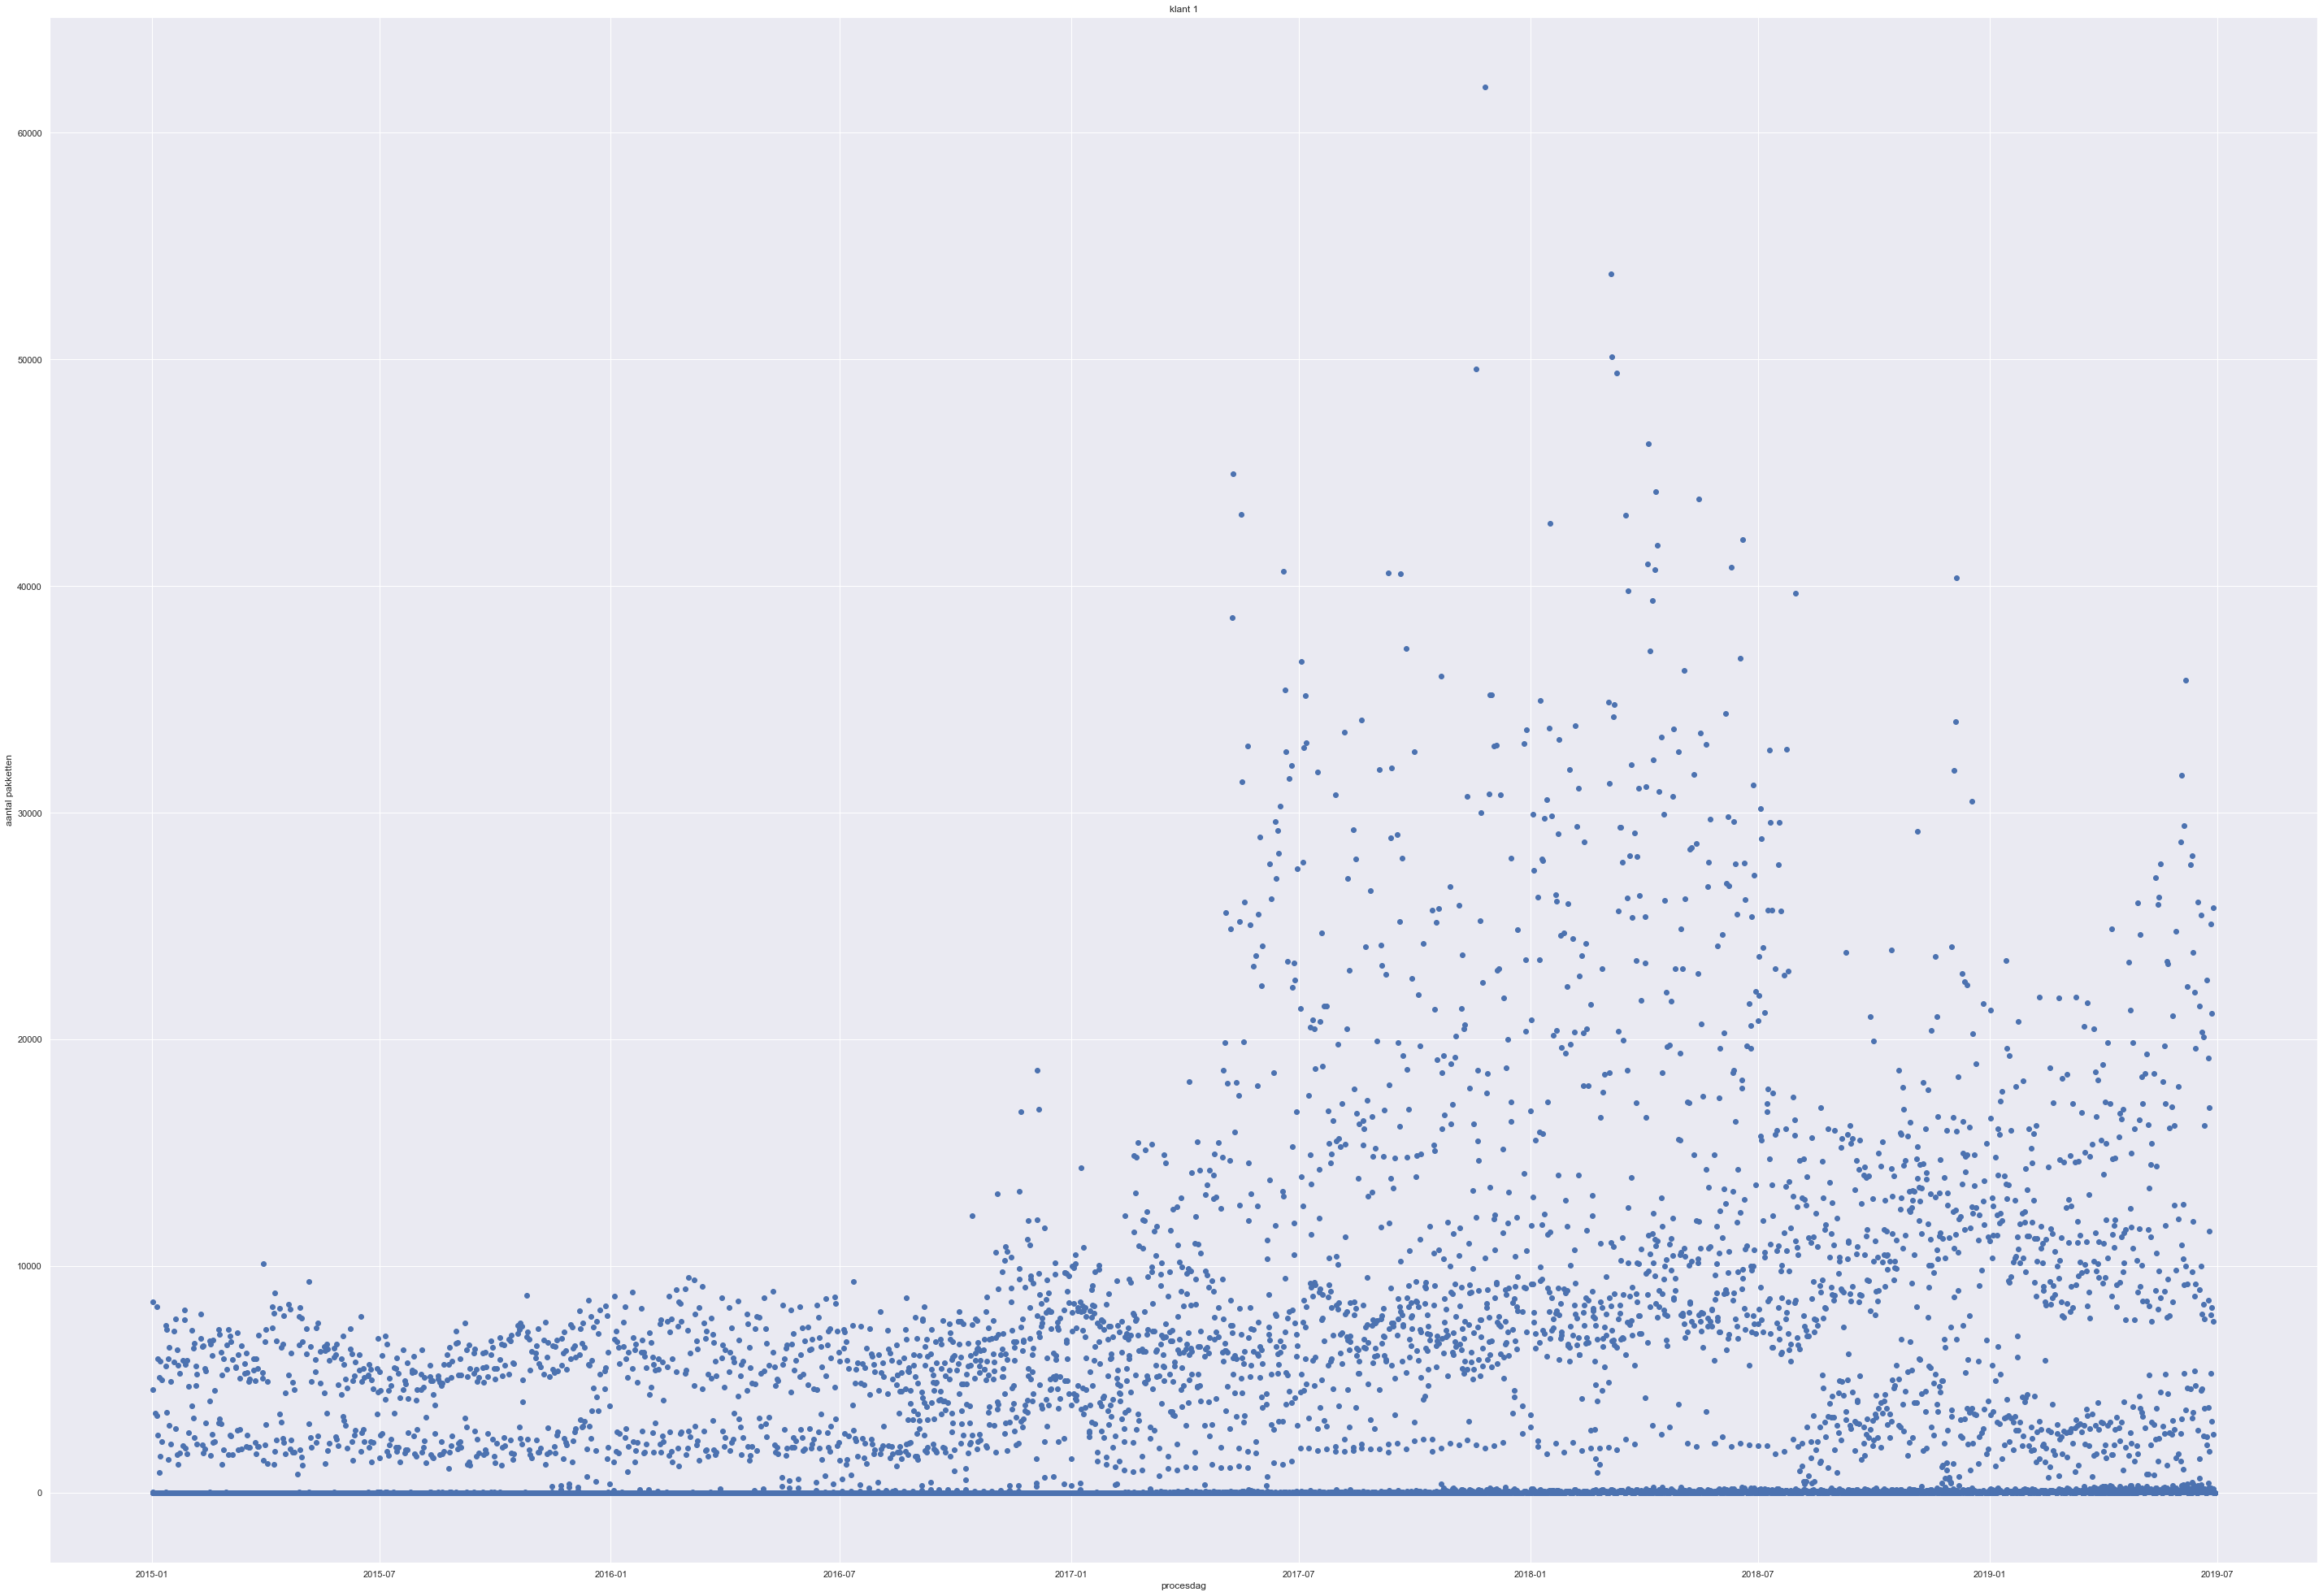

In [150]:
# Define X and Y, 1st plot (klant 1)
df_klant1 = new_df.where(new_df['cust_id'] == 'klant_1').dropna()
y = df['aantal_pakketten']
x = df['procesdag']
fig, ax = plt.subplots(figsize=(50, 35))
ax.scatter(x, y)
plt.xlabel('procesdag')
plt.ylabel('aantal pakketten')
plt.title('klant 1')
plt.show()

In [151]:
x = pd.to_datetime(df['procesdag']).map(dt.datetime.toordinal).to_numpy().reshape(-1, 1)
y = df['aantal_pakketten'].to_numpy().reshape(-1, 1)


# Training Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [152]:
y_pred = regressor.predict(x_test)

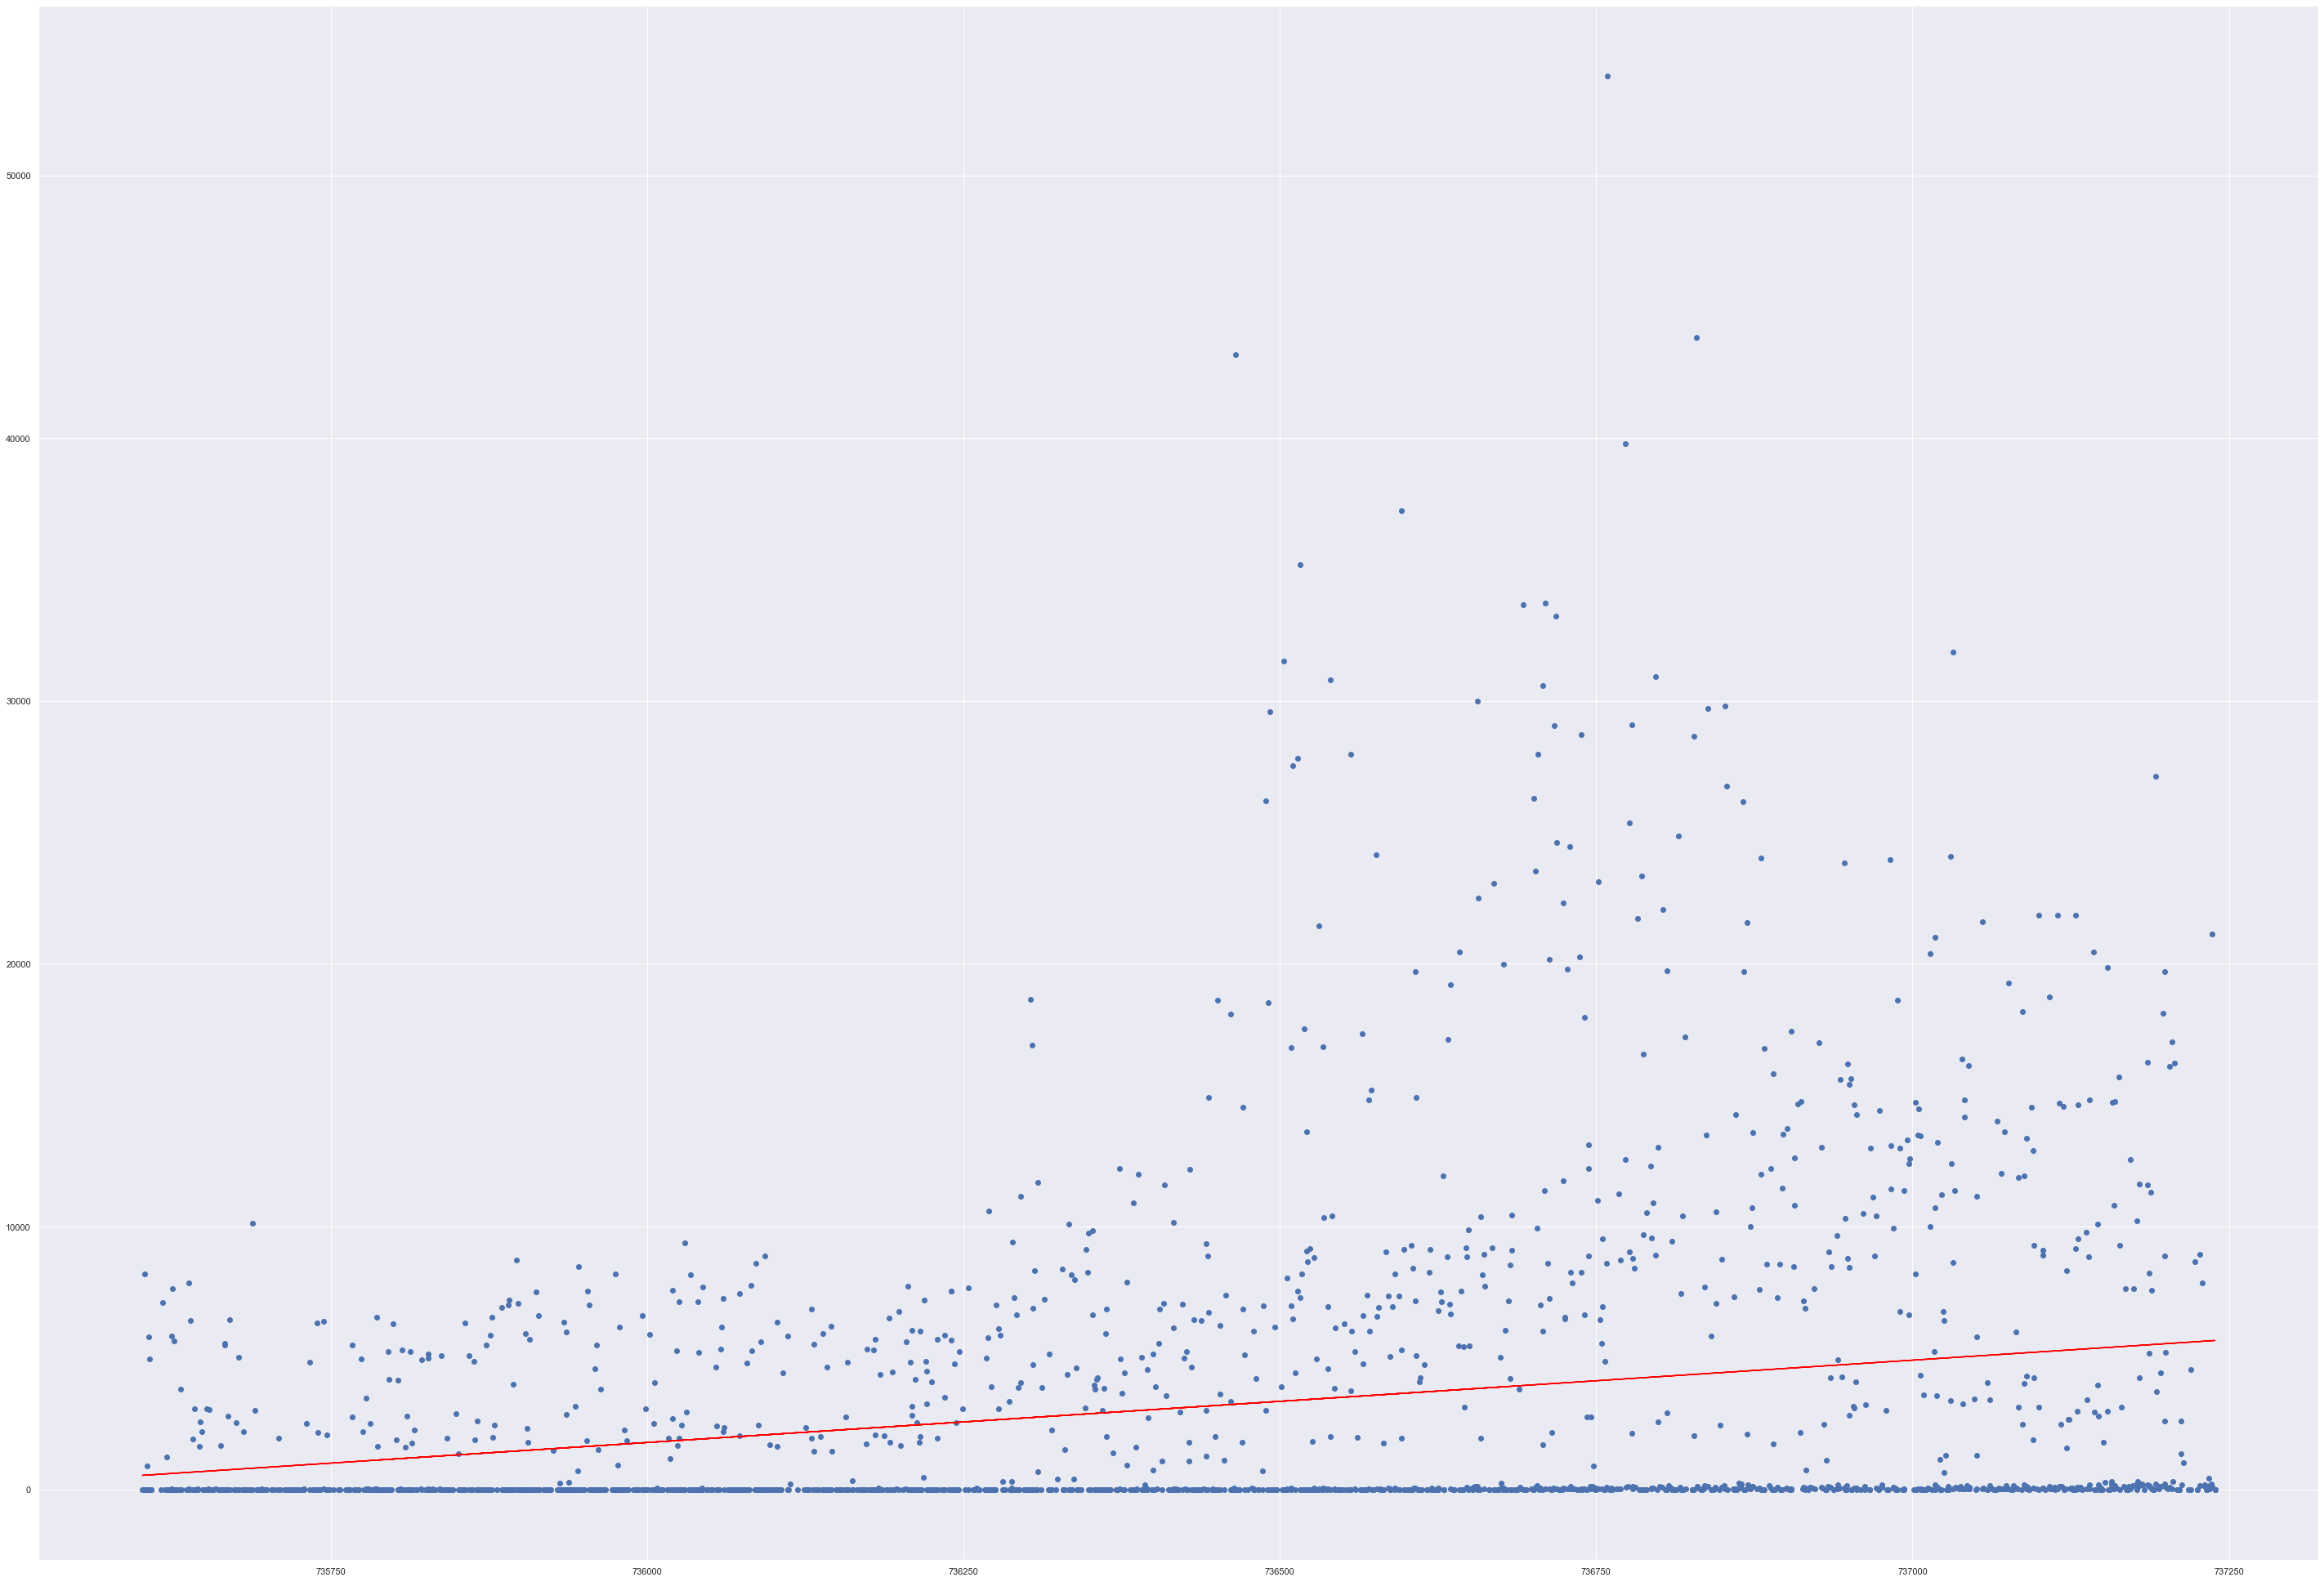

In [153]:
fig, ax = plt.subplots(figsize=(50, 35))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')
plt.show()